In [2]:
import numpy as np
import cv2
import pandas as pd

img = cv2.imread('image/Train_images/Sandstone_Versa0000.tif')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

df = pd.DataFrame()

# Add original pixel values to the data frame as feature 1
img2 = img.reshape(-1)
df['Original_Image'] = img2

# Add other features

# Gabor features
num = 1
kernels = []
for theta in range(2):
    theta = theta/4. * np.pi
    for sigma in (1, 3):
        for lamda in np.arange(0, np.pi, np.pi/4):
            for gamma in (0.05, 0.5):
                #print(theta, sigma, lamda, gamma)
                gabor_label = 'Gabor' + str(num)
                kernel = cv2.getGaborKernel((9, 9), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)
                kernels.append(kernel)
                
                fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)
                filtered_img = fimg.reshape(-1)
                df[gabor_label] = filtered_img
                num += 1
                # print(gabor_label)

print(df.head())

   Original_Image  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  Gabor7  \
0               0       0       0       0       0       0       0       0   
1               0       0       0       0       0       0       0       0   
2               0       0       0       0       0       0       0       0   
3               0       0       0       0       0       0       0       0   
4               0       0       0       0       0       0       0       0   

   Gabor8  Gabor9  ...  Gabor23  Gabor24  Gabor25  Gabor26  Gabor27  Gabor28  \
0       0       0  ...        0        0        0        0        0        0   
1       0       0  ...        0        0        0        0        0        0   
2       0       0  ...        0        0        0        0        0        0   
3       0       0  ...        0        0        0        0        0        0   
4       0       0  ...        0        0        0        0        0        0   

   Gabor29  Gabor30  Gabor31  Gabor32  
0        0      

In [3]:
# Canny edge

edges = cv2.Canny(img, 100, 200)
edges1 = edges.reshape(-1)
df['Canny Edge'] = edges1

print(df.head)

<bound method NDFrame.head of          Original_Image  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  \
0                     0       0       0       0       0       0       0   
1                     0       0       0       0       0       0       0   
2                     0       0       0       0       0       0       0   
3                     0       0       0       0       0       0       0   
4                     0       0       0       0       0       0       0   
...                 ...     ...     ...     ...     ...     ...     ...   
1019899               0       0       0       0       0       0       0   
1019900               0       0       0       0       0       0       0   
1019901               0       0       0       0       0       0       0   
1019902               0       0       0       0       0       0       0   
1019903               0       0       0       0       0       0       0   

         Gabor7  Gabor8  Gabor9  ...  Gabor24  Gabor25  Gabor26  Gabo

In [5]:
from skimage.filters import roberts, sobel, scharr, prewitt

edge_roberts = roberts(img)
edge_roberts1 = edge_roberts.reshape(-1)
df['Roberts'] = edge_roberts1

edge_sobel = sobel(img)
edge_sobel1 = edge_sobel.reshape(-1)
df['sobel'] = edge_sobel1

edge_scharr = scharr(img)
edge_scharr1 = edge_scharr.reshape(-1)
df['scharr'] = edge_scharr1

edge_prewitt = prewitt(img)
edge_prewitt1 = edge_prewitt.reshape(-1)
df['prewitt'] = edge_prewitt1


In [6]:
# Gaussian filters
from scipy import ndimage as nd

gaussian_img = nd.gaussian_filter(img, sigma=3)
gaussian_img1 = gaussian_img.reshape(-1)
df['gaussian_s3'] = gaussian_img1

gaussian_img2 = nd.gaussian_filter(img, sigma=7)
gaussian_img3 = gaussian_img2.reshape(-1)
df['gaussian_s7'] = gaussian_img3

# median filter
median_img = nd.median_filter(img, size=3)
median_img2 = median_img.reshape(-1)
df['median_img'] = median_img2

In [7]:
print(df.head)

<bound method NDFrame.head of          Original_Image  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  \
0                     0       0       0       0       0       0       0   
1                     0       0       0       0       0       0       0   
2                     0       0       0       0       0       0       0   
3                     0       0       0       0       0       0       0   
4                     0       0       0       0       0       0       0   
...                 ...     ...     ...     ...     ...     ...     ...   
1019899               0       0       0       0       0       0       0   
1019900               0       0       0       0       0       0       0   
1019901               0       0       0       0       0       0       0   
1019902               0       0       0       0       0       0       0   
1019903               0       0       0       0       0       0       0   

         Gabor7  Gabor8  Gabor9  ...  Gabor31  Gabor32  Canny Edge  R

In [8]:
labeled_img = cv2.imread('image/Train_masks/Sandstone_Versa0000.tif')
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_BGR2GRAY)
labeled_img2 = labeled_img.reshape(-1)

df['Labels'] = labeled_img2

print(df.head)

<bound method NDFrame.head of          Original_Image  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  \
0                     0       0       0       0       0       0       0   
1                     0       0       0       0       0       0       0   
2                     0       0       0       0       0       0       0   
3                     0       0       0       0       0       0       0   
4                     0       0       0       0       0       0       0   
...                 ...     ...     ...     ...     ...     ...     ...   
1019899               0       0       0       0       0       0       0   
1019900               0       0       0       0       0       0       0   
1019901               0       0       0       0       0       0       0   
1019902               0       0       0       0       0       0       0   
1019903               0       0       0       0       0       0       0   

         Gabor7  Gabor8  Gabor9  ...  Gabor32  Canny Edge  Roberts  s

In [14]:
# Dependent variable
Y = df['Labels'].values

X = df.drop(['Labels'],axis=1)

# Split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=20)

# import ML algorithm and train the model

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=10, random_state=42)

In [15]:
pred_test = model.predict(X_test)

from sklearn import metrics

print("Acc = ", metrics.accuracy_score(y_test,pred_test))


Acc =  0.9812408998877347


In [17]:
# Feature ranking

importance = list(model.feature_importances_)
feature_list = list(X.columns)
feature_imp = pd.Series(model.feature_importances_, index=feature_list).sort_values(ascending=False)

print(feature_imp.head(41))

median_img        2.809678e-01
Original_Image    2.496731e-01
gaussian_s3       1.938178e-01
Gabor4            8.640544e-02
Gabor11           6.667802e-02
gaussian_s7       2.840241e-02
Gabor6            1.469366e-02
prewitt           9.330256e-03
scharr            7.463699e-03
Gabor24           7.221955e-03
sobel             6.811571e-03
Gabor21           5.564296e-03
Gabor5            5.559876e-03
Roberts           5.479978e-03
Gabor3            5.061718e-03
Gabor7            3.999706e-03
Gabor23           3.352778e-03
Gabor8            3.076057e-03
Gabor31           2.646323e-03
Gabor29           2.605706e-03
Gabor32           2.444738e-03
Gabor12           2.244261e-03
Gabor30           2.208189e-03
Canny Edge        1.788450e-03
Gabor22           1.250179e-03
Gabor20           5.914109e-04
Gabor28           4.261819e-04
Gabor27           2.220233e-04
Gabor14           1.120127e-05
Gabor13           9.141213e-07
Gabor16           2.960422e-07
Gabor26           0.000000e+00
Gabor25 

In [19]:
# Save the model
import pickle

filename = 'sandstone_model'
pickle.dump(model, open(filename, 'wb'))



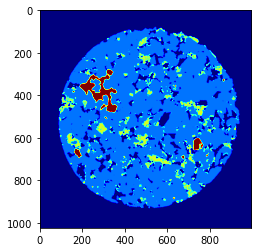

In [20]:
# load the model
load_model = pickle.load(open(filename, 'rb'))
result = load_model.predict(X)

segmented = result.reshape((img.shape))

from matplotlib import pyplot as plt

plt.figure()
plt.imshow(segmented, cmap='jet')

plt.imsave('segmented_rock.jpg', segmented, cmap='jet')